In [1]:
import numpy as np
import matplotlib.pyplot as pl

# Task A

In [2]:
def myfunc(x):
    
    # Task B
    f = x
    g = 1
    p = 5*x


    
    return (f,g,p)

In [2]:
# definition of functions, to be used in the func above, as needed
    
    # Task A
    f = 2*x
    g = 2
    p = np.cos(3*x)

    # Task B
    f = x
    g = 1
    p = 5*x

    # Task C
    # nuclear rod
    K = 16.75
    R = 0.015
    f = 1 / x
    g = 0
    p = -10**8*np.exp(-x/R)/(x*K)
    

In [4]:
# Task A
# Gaussian function, as defined last year
def MyGauss(A,b):
    
    # number of equations
    n = len(b)
    
    # eliminate the unknowns, from first to (n-1)th unknown, to form an upper triangular matrix
    for i in range(0,n-1):
        # eliminate the i-th unknown from the (i+1)th row downwards
        # i.e. set the zeros in column i.
        for j in range(i+1,n):
            # eliminate on row j

            # A(i,i) is the pivot coefficient
            p = A[j,i] / A[i,i]
        
            # compute the new elements of row j in matrix A
            # use slicing
            A[j,:] = A[j,:] - p * A[i,:]
            # or, alternatively, loop for every cell of row j
            #for k in range(i,n):
            #    A[j,k] = A[j,k] - p * A[i,k]

            # compute the new element of row j in vector b
            b[j] = b[j] - p * b[i]
    
    # evauate, by back substitution the solution
    # start from the last unknown and go upward till the first unknown
    x = np.zeros(n)
    for i in range(n-1,-1,-1):
        # contribution from b (right hand side of the equation)
        x[i] = b[i] / A[i,i]
        # contribution from the other (already evaluated) unknowns
        # (within the left hand side of the equation)
        for k in range(i+1,n):
            x[i] = x[i] - A[i,k] * x[k] / A[i,i]

    return x



In [4]:
# Task A1
def myodebc(a,b,ya,yb,N):


    # define the range
    x = np.linspace(a,b,N+1)
    # find the interval
    h = x[1] - x[0]


    # build a set of algebraic equation A * y = b
    # where A is N+1 by N+1
    A = np.zeros((N+1,N+1))
    b = np.zeros(N+1)
    # set the boundary conditions
    A[0,0] = 1
    b[0] = ya
    A[N,N] = 1
    b[N] = yb
    # set equations for the interior points
    for i in range(1,N):
        # evaluate the functions f, g and p at this x
        (f, g, p) = myfunc(x[i])
        A[i,i-1] = 1/h**2 - f / (2*h)
        A[i,i] = g - 2 / h**2
        A[i,i+1] = 1/h**2 + f / (2*h)
        b[i] = p

    y = MyGauss(A,b)

    return (x,y)


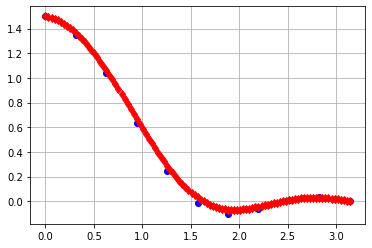

In [7]:
# Task A2
(x,y) = myodebc(0,np.pi,1.5,0,10)
pl.plot(x,y,'bo')
# Task A3
(x,y) = myodebc(0,np.pi,1.5,0,100)
pl.plot(x,y,'rd')
pl.grid()

# Task B

In [3]:
# Task B1
def myodebc2(a,b,bca,bcb,N,R):

    # define the range
    x = np.linspace(a,b,N+1)
    # find the interval
    h = x[1] - x[0]


    # build a set of algebraic equation A * y = b
    # where A is N+1 by N+1
    A = np.zeros((N+1,N+1))
    b = np.zeros(N+1)
    # set the boundary conditions
    # boundary a: we need the forward scheme
    A[0,0] = R[1] - R[0]/h
    A[0,1] = R[0]/h
    b[0] = bca
    
    # boundary b: we need the backward scheme
    A[N,N-1] = -R[2]/h
    A[N,N] = R[2]/h + R[3]
    b[N] = bcb

        
    # set equations for the interior points
    for i in range(1,N):
        # evaluate the functions f, g and p at this x
        (f, g, p) = myfunc(x[i])
        A[i,i-1] = 1/h**2 - f / (2*h)
        A[i,i] = g - 2 / h**2
        A[i,i+1] = 1/h**2 + f / (2*h)
        b[i] = p
            
    #y = MyGauss(A,b)
    y = np.dot(np.linalg.inv(A),b)
    
    
    return (x,y)


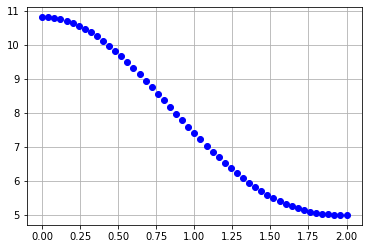

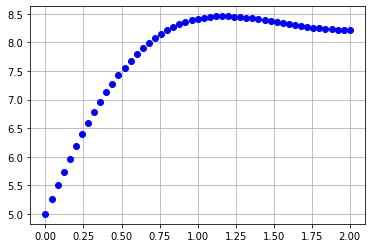

In [5]:
# Task B2
(x,y) = myodebc2(0,2,0,5,50,[1,0,0,1])
pl.plot(x,y,'bo')
pl.grid()
pl.show()
# Task B3
(x,y) = myodebc2(0,2,5,0,50,[0,1,1,0])
pl.plot(x,y,'bo')
pl.grid()

# Task C

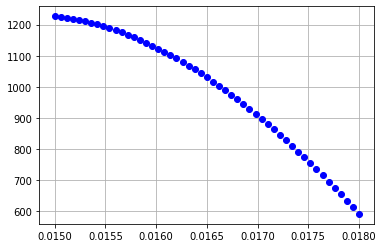

In [24]:
# Task C
# Nuclear rod

h = 6*10**4
K = 16.75
R = 0.015
w = 0.003
Tw = 473
Tw = 490
# 1
# set the b.c.
c = np.zeros(4)
# at boundary a
c[0] = 1
c[1] = 0
bca = -6.32*10**5 / K
# at boundary b
c[2] = 1
c[3] = h / K
bcb = h / K * Tw

(x,y) = myodebc2(R,R+w,bca,bcb,50,c)
pl.plot(x,y,'bo')
pl.grid()

# Task D

In [12]:
def funcN(t,y):
    f = np.ndarray(len(y))
    
    f[0] = y[1]
    f[1] = y[2]
    f[2] = -0.5*y[0]*y[2]

    return f

In [13]:
# System of N ODEs with Forward Euler (same as defined in session 5)
def FwEulerN(Y0,t0,tend,h):
    # determine the number of equations, i.e. variables
    Nv = len(Y0)
    # compose nodal times
    t = np.arange(t0,tend+h,h)
    # determine the number of time steps
    Nt = len(t)
    # allocate output array
    Y = np.ndarray((Nv,Nt))
    # initialise the solutions
    t[0] = t0
    Y[:,0] = Y0
    # compute the solution incrementally at subsequent time steps
    for it in range(1,Nt):
        f = funcN(t[it-1],Y[:,it-1])
        for iv in range(0,Nv):
            Y[iv,it] = Y[iv,it-1] + f[iv] * h
    return (t,Y)

In [17]:
# Lagrangian interpolation functions (same as defined in session 3)

# Langrangian polynomial
# compute the Lagrangian polynomials j, given nodes xn at a given point xp
def Lagrangian(j,xn,xp):
    # establish the number of nodes
    n = len(xn)
    # the order of the polynomial will then be n-1
    
    # set the initial value of the polynomial to 1
    L = 1
    # range of k is from 0 to n-1 (the order of the polynomial)
    for k in range(0,n):
        # exclude the case k == j
        if k != j:
            L *= (xp-xn[k]) / (xn[j]-xn[k])
    return L


def LagInterp(xn,yn,x):
    N = len(xn)
    # establish the order of the interpolating polynomial, N-1
    n = N - 1
    y = np.ndarray(len(x))
    # interpolate for all the values of x in the interpolating range
    for i in range(len(x)):
        # evaluate pn(xp)
        yp = 0
        # use Langrangian polynomial up to n, included
        for j in range(0,n+1):
            yp += yn[j] * Lagrangian(j,xn,x[i])
        # add the curren value of yp to the list of y
        y[i] = yp
    return y

In [18]:
# Numerical integration with Trapezium rule (same as defined in session 2)

def trapz(x,y):
    # get the number of subintervals
    N = len(x) - 1
    # compute the integral
    # set range for the trapezia: there are as many trapezia as the number of intervals
    R = range(0,N)
    S = 0
    for i in R:
        # compute the area of this single trapezium (remind yourself the area of a trapezium)
        S += 0.5 * (y[i+1] + y[i]) * (x[i+1] - x[i])
    return S

Iterations needed: 6
d99: 4.92   d1: 1.7268833654847116   d2: 0.6656019785179426


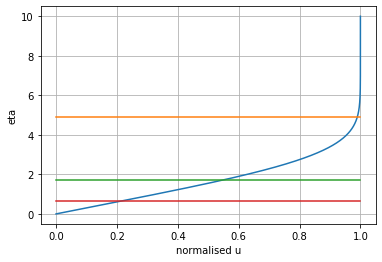

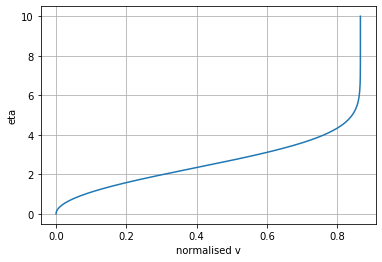

In [19]:
# Blasius
Nitmax = 10000 # we need to stop iteration if they become too large: the solution is diverging
tol = 1.0e-5 # desired tolerance for the error

# set the initial conditions
Y0 = np.ndarray(3)
# Y[0] contains f(at 0); Y[1] contains g(at 0); Y[2] contains h(at 0)
Y0[0] = 0 # f(at 0)
Y0[1] = 0 # g(at 0) ie velocity at 0
gfinal = 1 # g(at eta_max) ie velocity at eta_max
# Y0[0], Y0[1] and gfinal are the three physical boundary conditions, as specified by the problem

# this is the initial condition for the marching direct scheme. It is not a condition imposed by the problem
Y0[2] = 1 # h(at 0)acceleration at 0: this is a guess. it will readjusted during iterations

# set the domain
eta0 = 0 # lower boundary
etamax = 10 # upper boundary
N = 1000 # number of nodes
Deta = (etamax-eta0)/N  # eta step

# initialisations
err = 100  # set the error to a large value
Nit = 0    # count the iterations
hold = 0  # h(at 0)
gold = 0  # g(at 0) 

# iterate until reaching desired tolerance or exceed too many iterations
while err > tol and Nit < Nitmax:
    Nit += 1 # count iterations
    
    # solve with Forward Euler with current Y0 initial conditions. Y0[0], Y0[1] are given
    # by the problem specs, Y0[2] has been guessed
    (eta,Y) = FwEulerN(Y0,eta0,etamax,Deta)
    # Y[0,:] contains the solution f across the domain
    # Y[1,:] contains the velocity g across the domain
    # Y[2,:] contains the acceleration h across the domain
    
    g = np.array([gold,Y[1,-1]]) # set the two points of g for interpolation: the old g and the value just computed
    h = np.array([hold,Y0[2]])   # set the two points of h for interpolation: the old h and the value just computed
    hint = LagInterp(g,h,np.array([gfinal])) # calculate the new guess for h at gfinal
    # update old points with current values
    gold = Y[1,-1]
    hold = Y0[2]
    
    # set the new estimated value for h(at 0)
    Y0[2] = hint[0]
    
    # assess the error
    err = abs(Y[1,-1]-gfinal)

print('Iterations needed: '+str(Nit))


# plotting section

f = Y[0,:]  # displacement
u = Y[1,:]  # velocity
v = 0.5*(eta*u-f) #


# calculate thicknesses
diff = abs(u-0.99*max(u))
eta99 = diff.argmin()
# displacement thickness delta1 = int 0->infinity of 1-u(eta)
d1 = trapz(eta,max(u)-u)
# momentum thickness delta2 = int 0->infinity of u(eta)*(1-u(eta))
d2 = trapz(eta,u*(max(u)-u))
print('d99: '+str(eta[eta99])+'   d1: '+str(d1)+'   d2: '+str(d2))

# plot u and thicknesses
pl.plot(u,eta)
pl.grid()
pl.plot([0,max(u)],[eta[eta99],eta[eta99]])
pl.plot([0,max(u)],[d1,d1])
pl.plot([0,max(u)],[d2,d2])
pl.xlabel('normalised u')
pl.ylabel('eta')
pl.show()

# plot v
pl.plot(v,eta)
pl.grid()
pl.xlabel('normalised v')
pl.ylabel('eta')
pl.show()


